In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Target Search Term
target_user = ("@BBCWorld", "@CBS", "@CNNi",
                "@FoxNews", "@NYTimes", "@NPR")


# List to hold results
sentiments = []

#oldest_tweet = None

# Loop through all target users
for target in target_user:

    oldest_tweet = None
    tweet_count = 0

# Loop through 5 times for 100 tweets
    for x in range(1, 6):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, page=x, max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            time = tweet["created_at"]
            tweet_count += 1 

            #Store the Compound Sentiments
            sentiments.append({ "News Org": target,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "TimeStamp": time,
                               "Tweets Ago": tweet_count})

    


In [9]:
# create DataFrame based on twitter API responses
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head()
sentiments_df.to_csv("TwitterVaderMedia.csv")

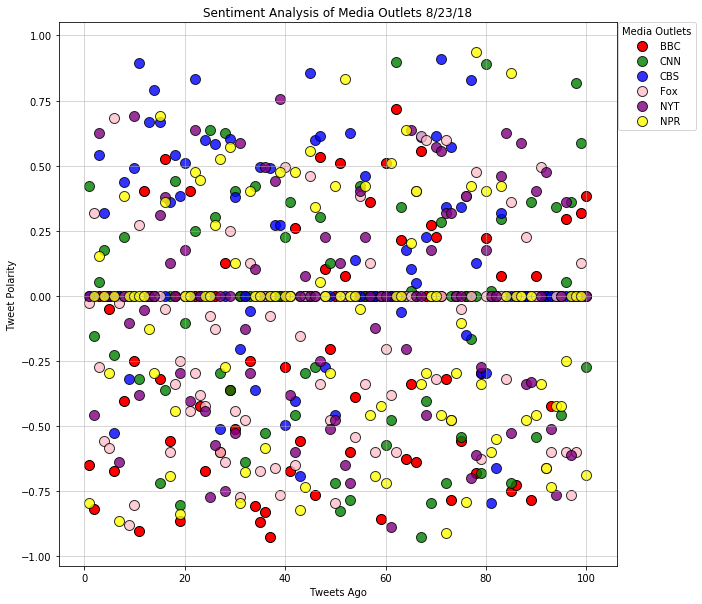

In [12]:
#Filter DataFrame to populate results to matplotlib scatter plot
BBC = sentiments_df.loc[(sentiments_df["News Org"]== "@BBCWorld")]
CNN = sentiments_df.loc[(sentiments_df["News Org"]== "@CNNi")]
CBS = sentiments_df.loc[(sentiments_df["News Org"]== "@CBS")]
FoxNews = sentiments_df.loc[(sentiments_df["News Org"]== "@FoxNews")]
NYT = sentiments_df.loc[(sentiments_df["News Org"]== "@NYTimes")]
NPR = sentiments_df.loc[(sentiments_df["News Org"]== "@NPR")]

#plotting the plots
plt.scatter(x=BBC["Tweets Ago"], y=BBC["Compound"],s=100, color='r', edgecolors="black", label="BBC")
plt.scatter(x=CNN["Tweets Ago"], y=CNN["Compound"],s=100, color='g',edgecolors="black", alpha=.8, label="CNN")
plt.scatter(x=CBS["Tweets Ago"], y=CBS["Compound"],s=100, color='b',edgecolors="black", alpha=.8, label="CBS")
plt.scatter(x=FoxNews["Tweets Ago"], y=FoxNews["Compound"],s=100, edgecolors="black", color='pink', alpha=.8, label="Fox")
plt.scatter(x=NYT["Tweets Ago"], y=NYT["Compound"],s=100, color='purple',edgecolors="black", alpha=.8, label="NYT")
plt.scatter(x=NPR["Tweets Ago"], y=NPR["Compound"],s=100, color='yellow',edgecolors="black", alpha=.8, label="NPR")


plt.legend(title = "Media Outlets",loc='upper right', bbox_to_anchor=(1.15, 1.01))

plt.title('Sentiment Analysis of Media Outlets 8/23/18')

# y label
plt.ylabel('Tweet Polarity')
plt.grid(linestyle='-', linewidth='0.5')
# x label
plt.xlabel('Tweets Ago')
plt.rcParams['figure.figsize'] = [10, 10]

plt.savefig('NewsOrgsVaderFig.png', bbox_inches='tight')
plt.show()


In [7]:
#creating compound averages to plot
BBC_avg = BBC["Compound"].mean()
CNN_avg = CNN["Compound"].mean()
CBS_avg = CBS["Compound"].mean()
Fox_avg = FoxNews["Compound"].mean()
NYT_avg = NYT["Compound"].mean()
NPR_avg = NPR["Compound"].mean()
NPR_avg

-0.07706699999999998

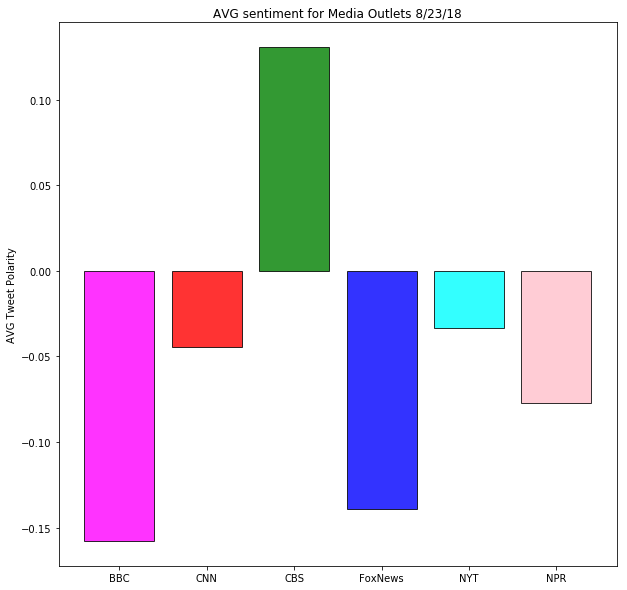

In [14]:
#creating bar graph to plot averages to
News = ("BBC", 'CNN', 'CBS', "FoxNews", 'NYT', "NPR")
compound_avg = (BBC_avg, CNN_avg, CBS_avg, Fox_avg , NYT_avg, NPR_avg)

y_pos = np.arange(len(News))

plt.bar(News, compound_avg, align='center', alpha=.8, color=['magenta', 'red', 'green', 'blue', 'cyan', "Pink"], edgecolor='black')

plt.xticks(y_pos, News)

plt.ylabel('AVG Tweet Polarity')
plt.title('AVG sentiment for Media Outlets 8/23/18')
plt.savefig('NewsOrgsVaderBar.png', bbox_inches='tight')
plt.show()

In [ ]:
#Analysis:  1) Scatter plot revealed the large cluster of tweets from all news organizations with 0 compound score,
            # as in the tweet was fully neutral.
#           2) CBS had the only positive compound vadar analysis, all others had a negative compound polarity score.
#           3) AVG sentiment scores changed daily, would be more interesting to get these averages over a year or 
            # 6 months and graph that.